<a href="https://colab.research.google.com/github/lmacanda/Biodiversity_analysis/blob/main/Biodiversity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


species = pd.read_csv("/content/species_info.csv")
observations = pd.read_csv("/content/observations.csv")

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


**1.What is the distribution of conservation_status for animals?**


In [8]:
# Replace NaN with 'No Intervention' to treat missing status as a category

species.fillna("No Intervention", inplace=True)

status_count = species.groupby("conservation_status")["scientific_name"].nunique().reset_index()
print(status_count)
status_count.columns = ["conservation_status", "count"]


  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2     No Intervention             5363
3  Species of Concern              151
4          Threatened               10


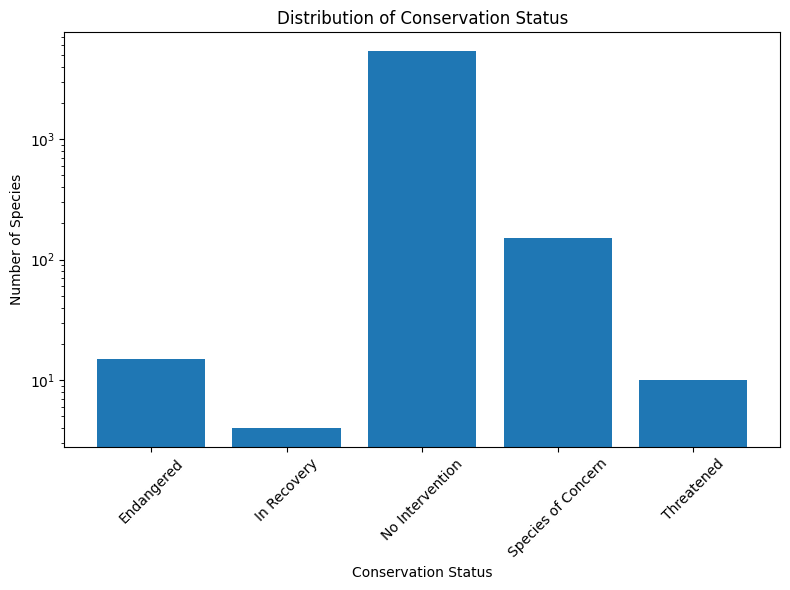

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(status_count["conservation_status"], status_count["count"])
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.title("Distribution of Conservation Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:

contingency = pd.crosstab(species['category'],species['conservation_status'])
print(contingency)

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                     1            0               73   
Bird                          4            3              442   
Fish                          3            0              116   
Mammal                        7            1              176   
Nonvascular Plant             0            0              328   
Reptile                       0            0               74   
Vascular Plant                1            0             4424   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                             4           2  
Bird                                 72           0  
Fish                                  4           4  
Mammal                               28           2  
Nonvascular Plant                     5           0  
Reptile                             

**2. Are certain types of species more likely to be endangered?**


In [17]:
grouped = species.groupby(["category","conservation_status"])["scientific_name"].nunique().reset_index()
grouped.rename(columns={"scientific_name":"species_count"}, inplace=True)
print(grouped)

             category conservation_status  species_count
0           Amphibian          Endangered              1
1           Amphibian     No Intervention             72
2           Amphibian  Species of Concern              4
3           Amphibian          Threatened              2
4                Bird          Endangered              4
5                Bird         In Recovery              3
6                Bird     No Intervention            413
7                Bird  Species of Concern             68
8                Fish          Endangered              3
9                Fish     No Intervention            115
10               Fish  Species of Concern              4
11               Fish          Threatened              4
12             Mammal          Endangered              6
13             Mammal         In Recovery              1
14             Mammal     No Intervention            146
15             Mammal  Species of Concern             22
16             Mammal          

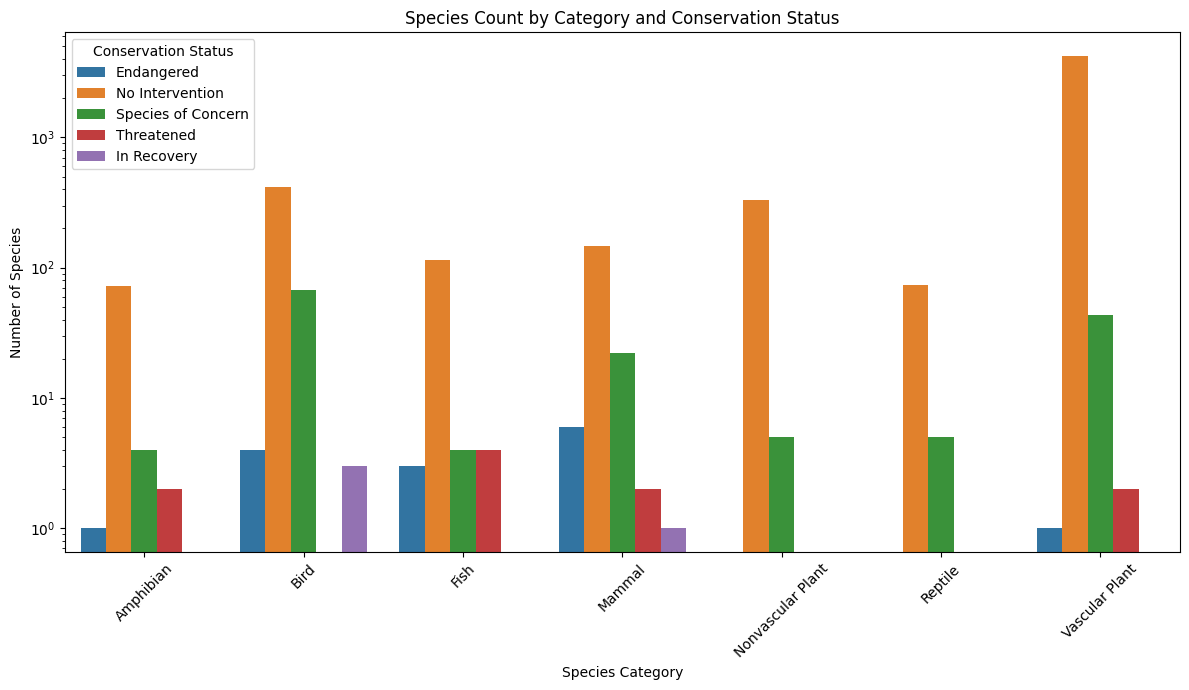

In [26]:
plt.figure(figsize=(12, 7))
sns.barplot(data=grouped, x='category', y='species_count', hue='conservation_status')

plt.title('Species Count by Category and Conservation Status')
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.xlabel('Species Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

In [18]:
pivot_table = grouped.pivot(index='category', columns='conservation_status', values='species_count').fillna(0)
print(pivot_table)

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                   1.0          0.0             72.0   
Bird                        4.0          3.0            413.0   
Fish                        3.0          0.0            115.0   
Mammal                      6.0          1.0            146.0   
Nonvascular Plant           0.0          0.0            328.0   
Reptile                     0.0          0.0             73.0   
Vascular Plant              1.0          0.0           4216.0   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                           4.0         2.0  
Bird                               68.0         0.0  
Fish                                4.0         4.0  
Mammal                             22.0         2.0  
Nonvascular Plant                   5.0         0.0  
Reptile                             

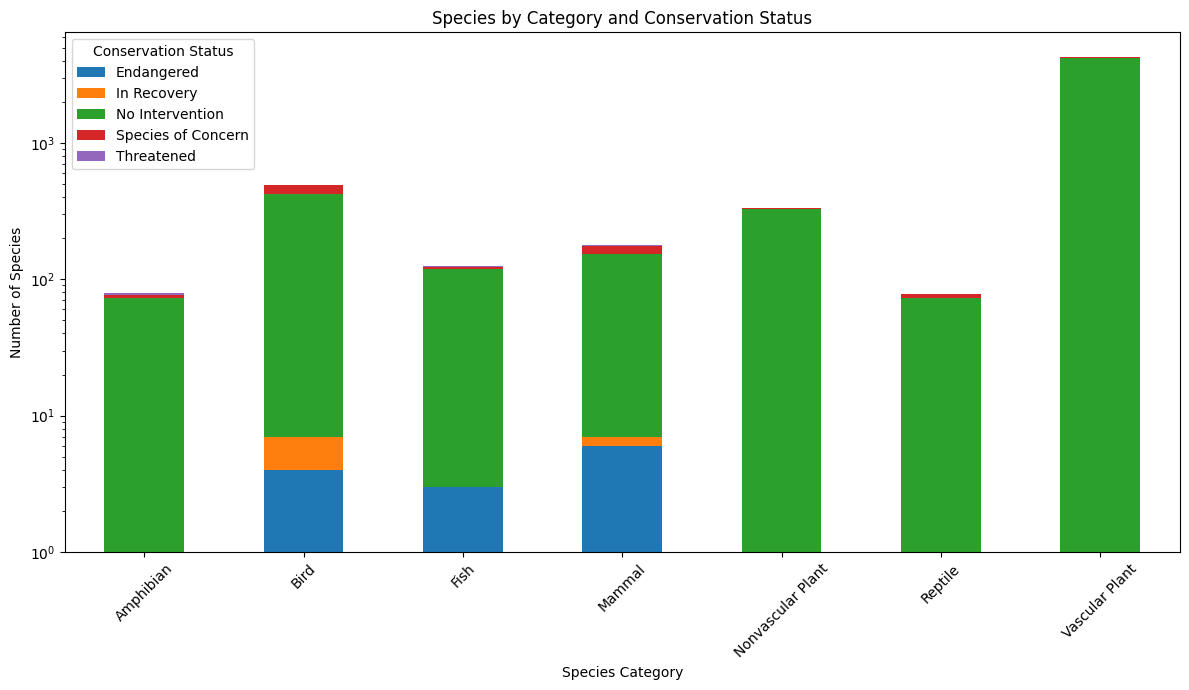

In [28]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Species by Category and Conservation Status')
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.xlabel('Species Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status')
plt.tight_layout()
plt.show()

**3.Are the differences between species and their conservation status significant?**



In [33]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(contingency)
print("Chi-squared statistic:", chi2)
print("P-value:", pval)

Chi-squared statistic: 628.581965798279
P-value: 2.4551423165990194e-117


There is a statistically significant relationship between the species category and conservation status.

If p-value < 0.05 → ✅ There is a significant relationship.

**4. Which species were spotted the most at each park?**

In [37]:
observ_and_species = species.merge(observations, on="scientific_name")
print(observ_and_species.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0     No Intervention                  Bryce National Park           130  
1     No Intervention            Yellowstone National Park           270  
2     No Intervention  Great Smoky Mountains National Park            98  
3     No Intervention               Yosemite National Park           117  
4     No Intervention               Yosemite National Park           128  


In [65]:
most_spotted_species = observ_and_species.groupby(["scientific_name","park_name"])["observations"].sum().reset_index()

most_spotted_species_per_park = most_spotted_species.loc[most_spotted_species.groupby("park_name")["observations"].idxmax()]

print(most_spotted_species_per_park)

sorted = most_spotted_species_per_park.sort_values("observations", ascending=True)



             scientific_name                            park_name  \
5436           Columba livia                  Bryce National Park   
19973  Streptopelia decaocto  Great Smoky Mountains National Park   
9810          Holcus lanatus            Yellowstone National Park   
10223   Hypochaeris radicata               Yosemite National Park   

       observations  
5436           1017  
19973           768  
9810           2415  
10223          1515  


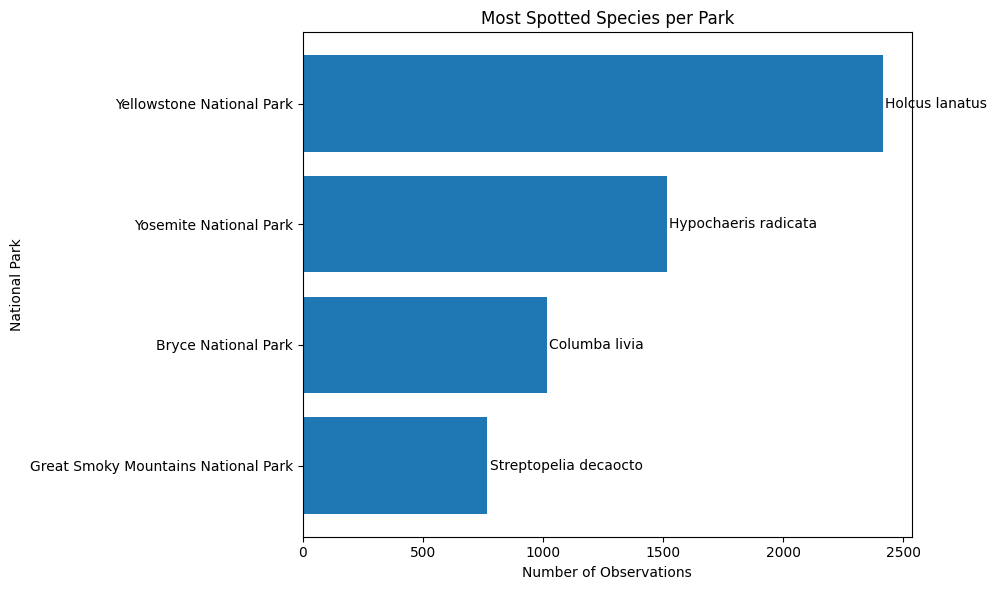

In [70]:



# Plot with species names as labels
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted["park_name"], sorted["observations"])

# Add species name labels on the bars
for bar, species in zip(bars, sorted["scientific_name"]):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, species, va='center')

plt.title("Most Spotted Species per Park")
plt.xlabel("Number of Observations")
plt.ylabel("National Park")
plt.tight_layout()
plt.show()